### ロジスティック回帰

　回帰とついているが、分類タスクに使用される教師あり学習の機械学習モデル。
ロジスティック回帰では2クラス分類を扱う。

　説明変数$\boldsymbol{x} = (x_1, x_2, \dots, x_m)^T \in \mathbb{R}^m$に対して、目的変数（出力)は、$y \in \{0, 1 \}$の2値になる。\
   線形回帰と同様に説明変数$\boldsymbol{x}$とパラメータ$\boldsymbol{w}$の線形結合$z=\boldsymbol{w}^T \boldsymbol{x}$を使用するが、その線形結合をシグモイド関数$\sigma(z)$に入力することで、その値を確率に変換する。（シグモイド関数は実数全体を[0,1]に変換する）

- #### シグモイド関数
$$
 \sigma(x) = \frac{1}{1 + \exp(-ax)}
$$
- #### シグモイド関数の性質

シグモイド関数の微分はシグモイド関数自身であらわすことができる。

$$
 \frac{\partial \sigma(x)}{\partial x} = a \sigma(x)(1-\sigma(x))
$$

※$a$の部分はゲインとも呼ばれ、値を変えることで関数の形も変わる。機械学習でよく使われるの$a=1$の形で、標準シグモイド関数とも呼ばれる。

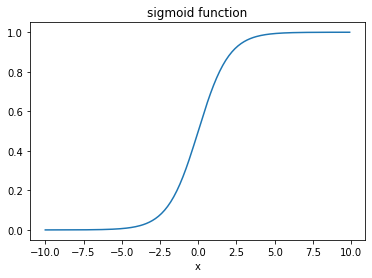

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10,10,0.1)
plt.plot(x, sigmoid(x))
plt.title("sigmoid function")
plt.xlabel("x")
plt.show()

　上のグラフから、シグモイド関数は入力が大きいほど1に漸近し、小さいほど0に漸近する。また入力が0のとき0.5となることがわかる。分類タスクにおいて、学習が終わった後の$\boldsymbol{w}^T \boldsymbol{x} = 0$はクラスを2分割する境界線（面）になる。ある入力の線形結合が0に等しいとき、そのデータは境界線上に位置することになり、どちらのクラスに属するか確率は0.5（1/2）となる。

### シグモイド関数の出力と確率の対応について

 シグモイド関数の出力は、あるデータが入力されたときにそのデータがクラス1に属する確率に対応させる。
 
 $$
  P(Y=1|\boldsymbol{x}) = \sigma(w_0 + w_1 x_1 + \dots + w_m x_m)
 $$
 
 この出力が0.5以上ならばクラス１、未満ならクラス０と予測する。 

### ロジスティック回帰のパラメータ推定

- #### 最尤推定
ロジスティック回帰でも線形回帰と同様パラメータ$\boldsymbol{w}$を教師データより学習する。
そのときに使われる手法（考え方）が最尤推定。

- #### ベルヌーイ分布
コイン投げのように確率変数$X$が確率$p$で$1$、確率$1-p$で$0$をとるような試行を$n$回繰り返す試行をベルヌーイ試行と呼び、この確率分布を二項分布という。X=1となる回数が$x$回となる確率は次のように表される。
$$
{}_n C _x p^x (1-p)^{n-x}
$$

　特に$n=1$のときをベルヌーイ分布という。
このとき、その確率は、

$$
 P(X) = p^x (1-p)^{1-x}
$$

と書ける。このとき$X = 1 \ {or}\  0$である。

- #### ベルヌーイ分布のパラメータ推定

　ベルヌーイ分布におけるパラメータは確率$p$。普通$p$は既知ではないためデータからそのパラメータを推定することになる。\
1回の試行で$X=x_1$となる確率は

$$
 P(X=x_1) = p^{x_1} (1-p)^{1-x_1}
$$

n回の試行で$X=(x_1, \dots, x_n)$となる確率は、確率変数同士が独立だと仮定すると、
$$
 P(x_1, x_2, \dots, x_n;p) = \prod_{i=1}^{n} p^{x_i} (1-p)^{1-x_i}
$$
と書ける。
これを$p$の関数と見たとき、上の式を尤度関数と呼ぶ。この尤度関数を最大にするような$p$を推定することを最尤推定という。
（得られたデータ$X$について、どのようなパラメータ$p$をもつ分布から発生したと考えることが尤もらしいかを推定する。）

- #### ロジスティック回帰における最尤推定

　ロジスティック回帰では、パラメータは$\boldsymbol{w}$であり、その確率はシグモイド関数$\sigma(\boldsymbol{w}^T \boldsymbol{x})$であるので、
クラスが$Y=y$となる確率は、それぞれのデータ$x_1, \dots, x_n$について

$$
 P(Y=y_1|\boldsymbol{x_1}) = \sigma(\boldsymbol{w}^T \boldsymbol{x_1})^{y_1} (1 - \sigma(\boldsymbol{w}^T \boldsymbol{x_1}))^{1-y_1} \\
 \vdots \\
 P(Y=y_n|\boldsymbol{x_n}) = \sigma(\boldsymbol{w}^T \boldsymbol{x_n})^{y_n} (1 - \sigma(\boldsymbol{w}^T \boldsymbol{x_n}))^{1-y_n}
$$

となるので、先ほどと同じように尤度関数は$w$の関数として
$$
 L(\boldsymbol{w}) = \prod_{i=1}^{n} \sigma(\boldsymbol{w}^T \boldsymbol{x_i})^{y_i} (1 - \sigma(\boldsymbol{w}^T \boldsymbol{x_i}))^{1-y_i}
$$

と書ける。これを最大化する$w$を求めるが、対数をとることで計算しやすくなる。これを対数尤度と呼ぶ。また、マイナスをかけたものを考え、最小二乗法と同じように、対数尤度を最小化するような$w$を求める。これをコスト関数$E(w)$とすると、

$$
\begin{eqnarray}
 E(w) &=& -Log L(w) \\
&=& -\sum_{i=1}^{n} \{ y_i \log{p_i} + (1 - y_i) \log(1 - p_i) \}
\end{eqnarray}
$$

となる。最小二乗法の場合とは異なり、これを解析的に解くことができない。そのうえで、$E(w)$を$w$について最小化することが問題となる。

- #### 勾配降下法
反復的に学習を行い、パラメータを更新していく方法。
k回目の学習の$w$を用いて、k+1回目のwを次の式で求める。

$$
 w(k+1) = w(k) - \eta \frac{\partial E(w)}{\partial w}
$$

$\eta$は学習率と呼ばれ、1回の更新でどれだけ$w$を動かすかを決める。
ロジスティック回帰の場合には、対数尤度を用いて次のように書ける。

$$
  w(k+1) = w(k) + \eta  \sum_{i=1}^{n} (y_i - p_i) \boldsymbol{x}_i 
$$

この方法では1回の更新で、全学習データに対する和の計算が必要になり、データが大きい場合などにメモリに乗らなかったり、学習時間が莫大になる問題がある。


- #### 確率的勾配降下法

勾配降下法の問題点を解決するために、全データを用いるのではなく、ランダムに一ずつのデータを選んでパラメータを更新する。

$$
  w(k+1) = w(k) + \eta   (y_i - p_i) \boldsymbol{x}_i 
$$

### 分類問題の評価指標

- #### 混同行列
真のラベルと予測結果を分類して個数をまとめた表

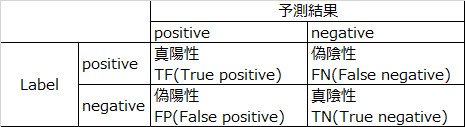

真陽性：正しく陽と判定した個数 \
偽陽性：間違えて陽性と判定した個数 \
真陰性：正しく陰性と判定した個数 \
偽陰性：間違えて陰性と判定した個数

- #### 正解率（Accuracy）
よく使われる指標、全体のデータ数のうち正解した割合\
予測するクラスにデータ数の偏りがあるような場合は正解率では判断できない。

$$
 \frac{TP + TN}{TP + FN + FP + TN}
$$

- #### 再現率(Recall)
本当のラベルがPositiveの中からPositiveと予測できた割合。\
FPについては考えない。病気の診断などPositiveなものをどれだけ拾えるかを重要視したい場合に用いられる。

$$
 \frac{TP}{TP + FN}
$$

- #### 適合率(Precision)
モデルがPositiveと予測したものの中で本当にPositiveである割合。
FNについては考えない。見逃しは多くても正確な予測をしたい場合に使われる指標。\
スパムメールの判別など、最悪自分でスパムを振り分ければよいものなど

$$
 \frac{TP}{TP + FP}
$$

- #### F値
RecallとPrecisionはどちらはトレードオフの関係にあるため、その調和平均をとることで性能を評価することもある。
F値が高ければRecallとPrecisionも高くなる。

$$
 \frac{2 \times Prexision \times Recall}{Precision + Recall}
$$

### ハンズオン
タイタニックデータセット\
課題：年齢が30歳の男性乗客が生き残れるのか,ロジスティック回帰を用いて予測\
課題は最後に実施

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

データの読み込みと先頭5行の表示

In [19]:
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


特徴量の選択
不要と考えられる情報をドロップする。
ここではPassengerId, Name, Ticket, Cabinを削除

In [20]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
#欠損値のある列名の表示
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

AgeとEmbarkedがNullを含む。

欠損値nullを含む行の表示

In [30]:
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


年齢の欠損値を平均値で埋める。列は新しいもの追加

In [31]:
titanic_df["AgeFill"] = titanic_df["Age"].fillna(value=titanic_df["Age"].mean())
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


### ロジスティック回帰

#### チケットの値段"Fare"から生死を判別

In [32]:
data1 = titanic_df.loc[:, ["Fare"]].values

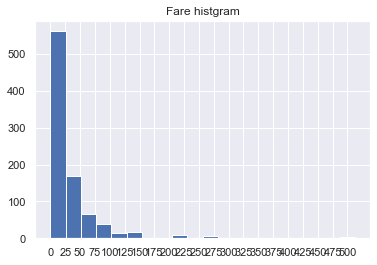

In [56]:
plt.hist(data1, bins=20)
plt.xticks(np.arange(0,data1.max()+1,25))
plt.title("Fare histgram")
plt.show()

In [34]:
label1 = titanic_df.loc[:, ["Survived"]].values

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()
clf.fit(data1, label1)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
clf.predict([[61]])

array([0], dtype=int64)

In [43]:
clf.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

各データの決定関数値を取得
※決定境界からの距離に比例する値を出力する関数

In [57]:
X_test_value = clf.decision_function(data1)

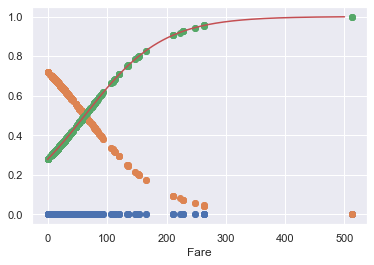

In [70]:
#シグモイド関数内の切片と係数を取得
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]

#シグモイド関数の定義
def sigmoid(x):
    return 1 / (1+np.exp(-(w1*x+w0)))

x_range = np.linspace(-1, 500, 3000)
plt.figure()

plt.plot(data1, np.zeros(len(data1)), "o")
plt.plot(data1, clf.predict_proba(data1), "o")
plt.plot(x_range, sigmoid(x_range), "-")
plt.xlabel("Fare")

plt.show()

緑のプロットが運賃に対する生き残り確率のプロット\
オレンジが死亡する確率のプロット\
運賃が高いほうが生き残る確率が高いと予測される。

Fareのヒストグラムを生死別に色分けしてみる（本当なら最初にしたほうがいい）

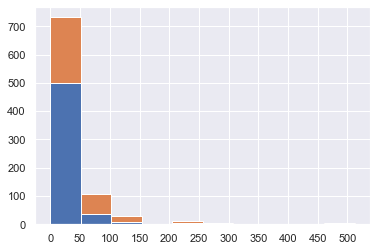

In [108]:
plt.figure()
plt.xticks(np.arange(0,500+1,50))
plt.hist([titanic_df[titanic_df["Survived"] == 0]["Fare"],titanic_df[titanic_df["Survived"] == 1]["Fare"]], histtype="barstacked")
plt.show()

#### 2変数から生死を判別

In [109]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
0,0,3,male,22.0,1,0,7.2500,S,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0


性別を女性を0,男性を1に変換する

In [110]:
titanic_df["Gender"] = titanic_df["Sex"].map({"female":0, "male": 1}).astype("int")

In [112]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0
3,1,1,female,35.0,1,0,53.1000,S,35.0,0
4,0,3,male,35.0,0,0,8.0500,S,35.0,1


Pclass(社会的地位）と性別(Genger)を足した特徴量を作成する\
中流の男性(Pclass_Gender=3)と上流の女性（Pclass_Gender=3）となるので、実際に有効なのか？
結果の解釈が難しくなるかもしれない。

In [114]:
titanic_df["Pclass_Gender"] = titanic_df["Pclass"] + titanic_df["Gender"]
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


Pclass_GenderとAgeの2変量の関係

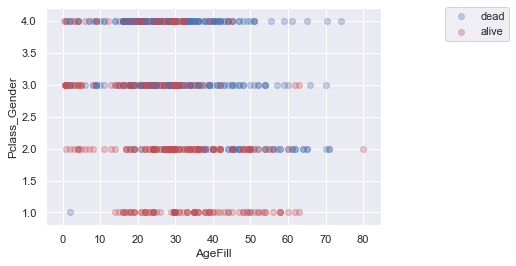

In [121]:
#survived=0の行番号を取得
index_dead = titanic_df[titanic_df["Survived"]==0].index

#survived=1の行番号を取得
index_alive = titanic_df[titanic_df["Survived"]==1].index


fig, ax = plt.subplots()
ax.scatter(titanic_df.loc[index_dead, "AgeFill"],
          titanic_df.loc[index_dead, "Pclass_Gender"], label="dead", color="b", alpha=0.3)

ax.scatter(titanic_df.loc[index_alive, "AgeFill"],
          titanic_df.loc[index_alive, "Pclass_Gender"], label="alive", color="r", alpha=0.3)


ax.set_xlabel("AgeFill")
ax.set_ylabel("Pclass_Gender")
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [130]:
data2 = titanic_df.loc[:, ["AgeFill","Pclass_Gender"]].values
label2 = titanic_df.loc[:, ["Survived"]].values.reshape(-1,) 

In [133]:
#modelの作成
model2 = LogisticRegression()
model2.fit(data2, label2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

このモデルを使用することで二変数に対して生存の予測ができる。

### モデルの評価\

In [163]:
val_df = titanic_df.loc[:, ["Fare", "AgeFill", "Pclass_Gender"]]
data3 = val_df.values
label3 = titanic_df.loc[:, ["Survived"]].values
data3[:,[1,2]]
#data3についてはFareのみを取得するにはval_df[:, 0]

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [151]:
#traindataとtestdataの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data3, label3, test_size=0.2, random_state=1)

In [179]:
#modelのトレーニング
eval_model1 = LogisticRegression().fit(X_train[:,0].reshape(-1,1), y_train.reshape(-1,))
eval_model2 = LogisticRegression().fit(X_train[:,[1,2]], y_train.reshape(-1,))

In [180]:
#予測
pred_model1 = eval_model1.predict(X_test[:,0].reshape(-1,1))
pred_model2 = eval_model2.predict(X_test[:,[1,2]])

In [189]:
#予測値と正解の比較
print("model1 socore : {:.2f}".format(eval_model1.score(X_test[:,0].reshape(-1,1), y_test)))
print("model2 socore : {:.2f}".format(eval_model2.score(X_test[:,[1,2]], y_test)))

model1 socore : 0.60
model2 socore : 0.76


各性能指標の値の取得

In [194]:
from sklearn import metrics
print("model1")
print(metrics.classification_report(y_test, pred_model1))
print("-"*100)

print("model2")
print(metrics.classification_report(y_test, pred_model2))
print("-"*100)

model1
              precision    recall  f1-score   support

           0       0.61      0.92      0.73       106
           1       0.55      0.15      0.24        73

    accuracy                           0.60       179
   macro avg       0.58      0.53      0.48       179
weighted avg       0.59      0.60      0.53       179

----------------------------------------------------------------------------------------------------
model2
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       106
           1       0.77      0.59      0.67        73

    accuracy                           0.76       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179

----------------------------------------------------------------------------------------------------


混同行列の取得
左上がTN,右上がFP,左下がFP,右下がTP

In [198]:
from sklearn.metrics import confusion_matrix
print("model1")
print(confusion_matrix(y_test, pred_model1))
print("-"*100)
print("model2")
print(confusion_matrix(y_test, pred_model2))
print("-"*100)

model1
[[97  9]
 [62 11]]
----------------------------------------------------------------------------------------------------
model2
[[93 13]
 [30 43]]
----------------------------------------------------------------------------------------------------


混同行列をヒートマップで

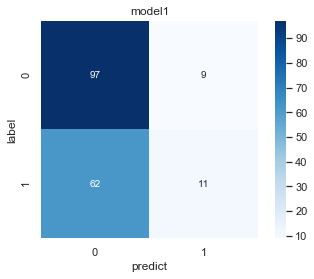

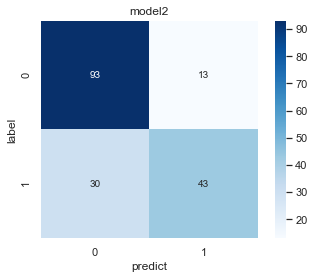

In [206]:
fig = plt.figure()
sns.heatmap(confusion_matrix(y_test, pred_model1),
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)
plt.title("model1")
plt.xlabel("predict")
plt.ylabel("label")

plt.show()

fig = plt.figure()
sns.heatmap(confusion_matrix(y_test, pred_model2),
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)
plt.title("model2")
plt.xlabel("predict")
plt.ylabel("label")
plt.show()

### 課題
性別と年齢による予測を実装し、30歳で男の乗客が生き残れるかを推測する。

In [207]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [216]:
data = titanic_df.loc[:, ["AgeFill", "Gender"]].values
label = titanic_df.loc[:, ["Survived"]].values

ここでは全データを使用してモデル化し、予測してみる。

In [217]:
clf = LogisticRegression()
clf.fit(data, label)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
#予測
clf.predict([[30.0, 1]])

array([0], dtype=int64)

予測値では30歳の男性は生き残れない

In [222]:
#この分類の正解率は？
clf.score(data, label)

0.7867564534231201